# Airline Customer Satisfaction

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [ ]:
df_test = pd.read_csv("test.csv") 

In [ ]:
df_train = pd.read_csv("test.csv") 

In [ ]:
df = pd.concat([df_train, df_test])

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.shape

(51952, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51952 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         51952 non-null  int64  
 1   id                                 51952 non-null  int64  
 2   Gender                             51952 non-null  object 
 3   Customer Type                      51952 non-null  object 
 4   Age                                51952 non-null  int64  
 5   Type of Travel                     51952 non-null  object 
 6   Class                              51952 non-null  object 
 7   Flight Distance                    51952 non-null  int64  
 8   Inflight wifi service              51952 non-null  int64  
 9   Departure/Arrival time convenient  51952 non-null  int64  
 10  Ease of Online booking             51952 non-null  int64  
 11  Gate location                      51952 non-null  int

In [ ]:
df = df.dropna()

In [ ]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [ ]:
df.drop('id', axis =1, inplace=True)

In [ ]:
df.duplicated().sum()

25893

In [ ]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3279
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            311
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

## Data Cleaning and Analysis

In [ ]:
categ = [cat for cat in df.columns if df[cat].dtypes == 'O']
print('Number of categorical variables: ', len(categ))
print('Categorical variables column name:',categ)

Number of categorical variables:  5
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [ ]:
numerical = [num for num in df.columns if df[num].dtypes != 'O']
print('Number of numerical variables: ', len(numerical))
print('Categorical numerical column name:',numerical)

Number of numerical variables:  18
Categorical numerical column name: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


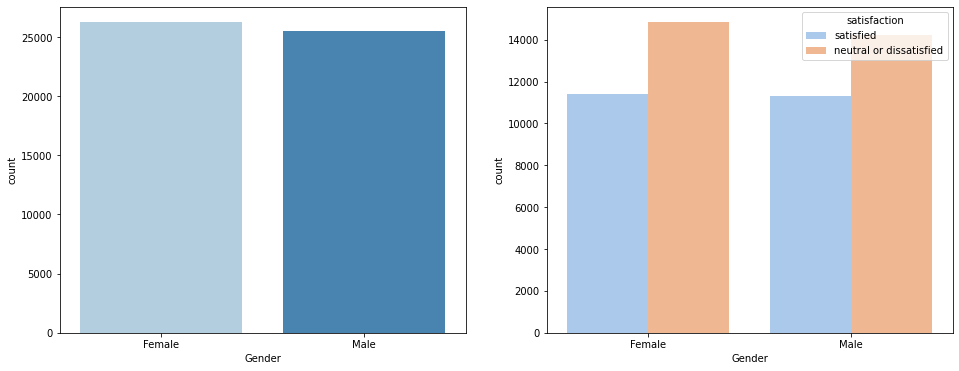

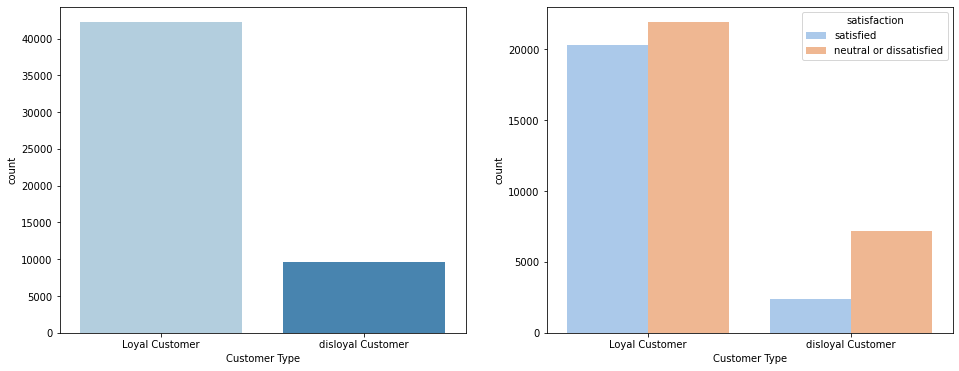

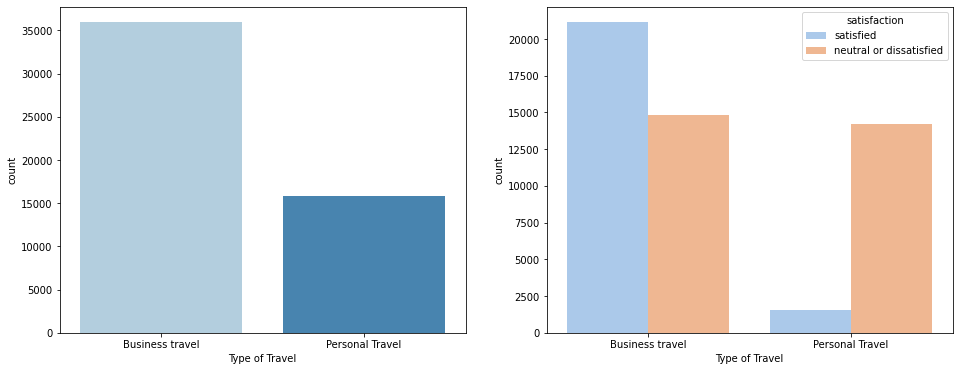

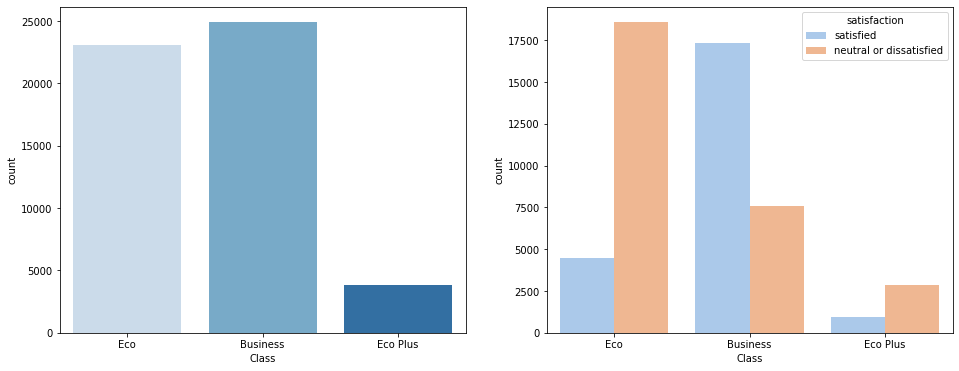

In [ ]:
for i in categ[:-1]:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df[i], palette='Blues')

  plt.subplot(1,2,2)
  sns.countplot(x=df[i],hue=df.satisfaction, palette='pastel')
  plt.show()

In [ ]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3279
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            311
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [ ]:
full_num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
num_labels = []
for feature in numerical:
  if not feature in full_num:
    num_labels.append(feature)

num_labels

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [ ]:
len(numerical), len(num_labels), len(full_num)

(18, 14, 4)

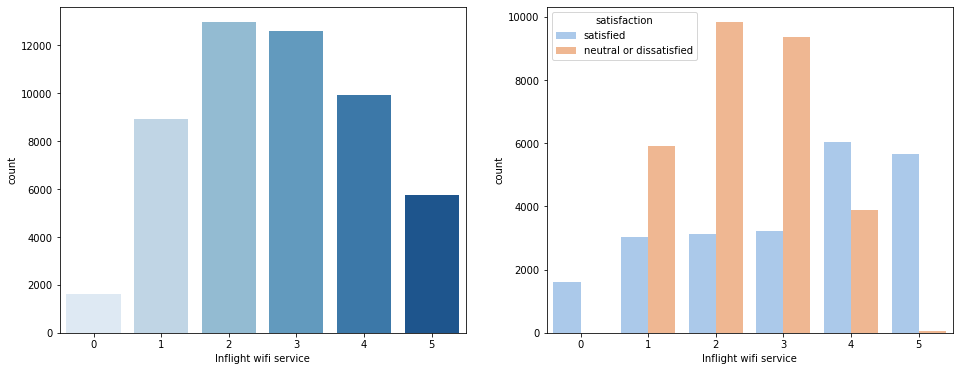

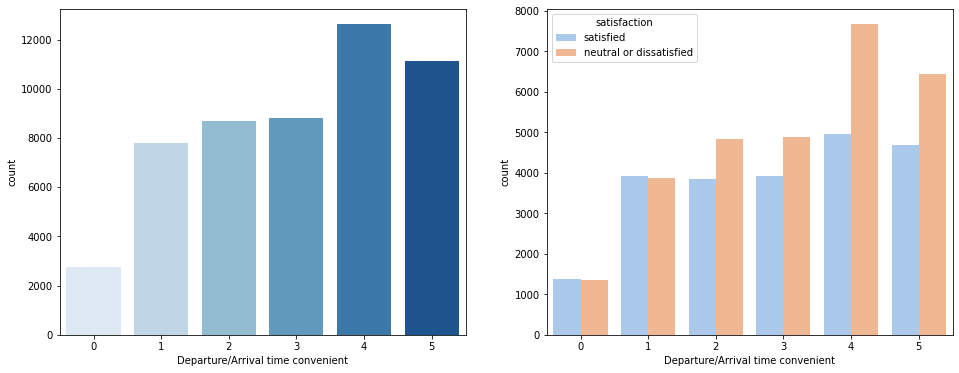

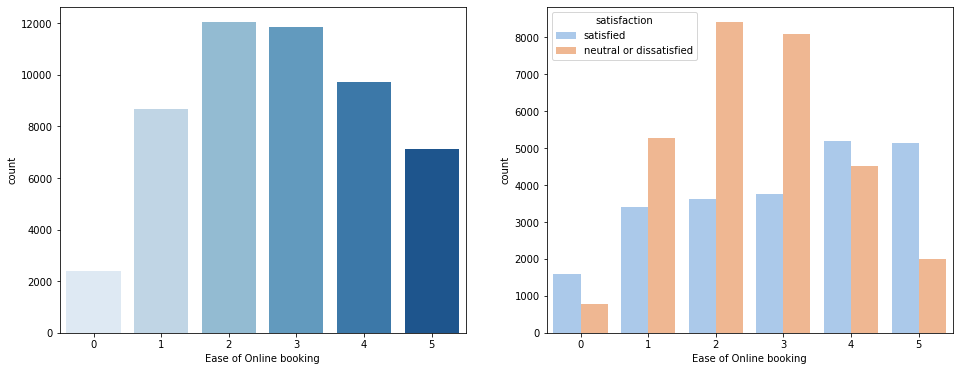

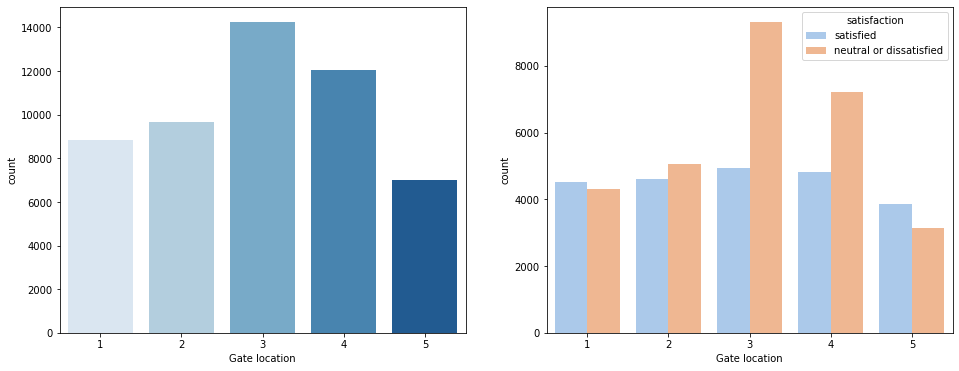

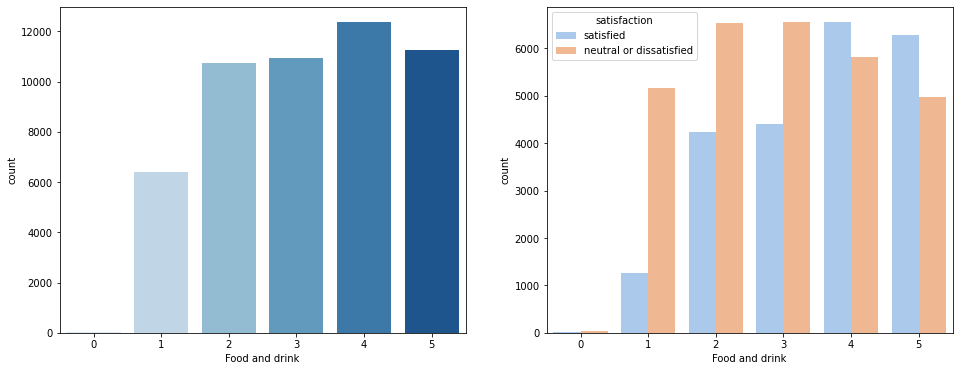

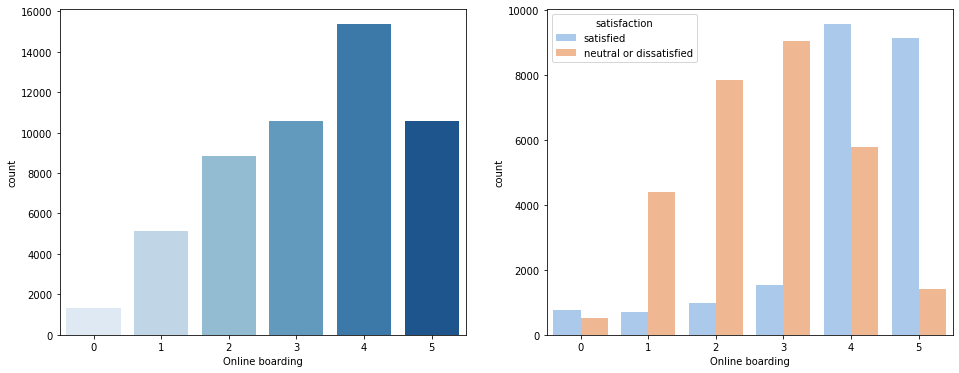

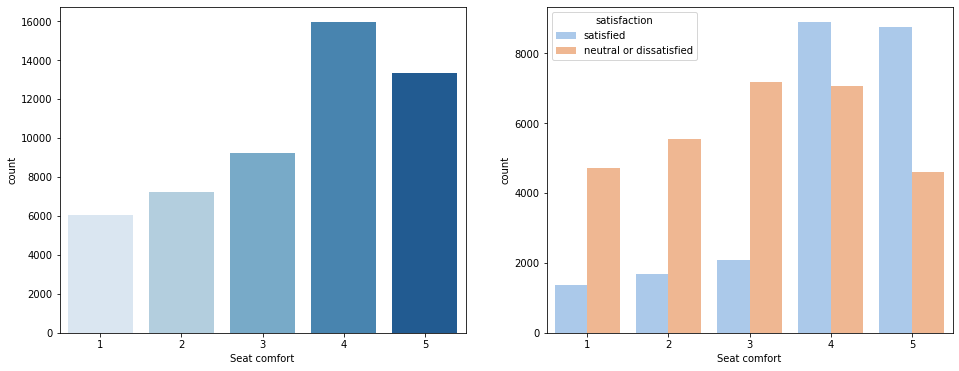

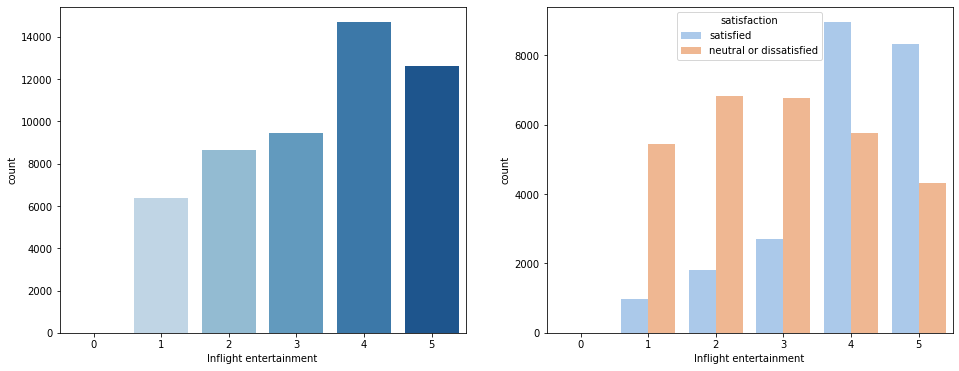

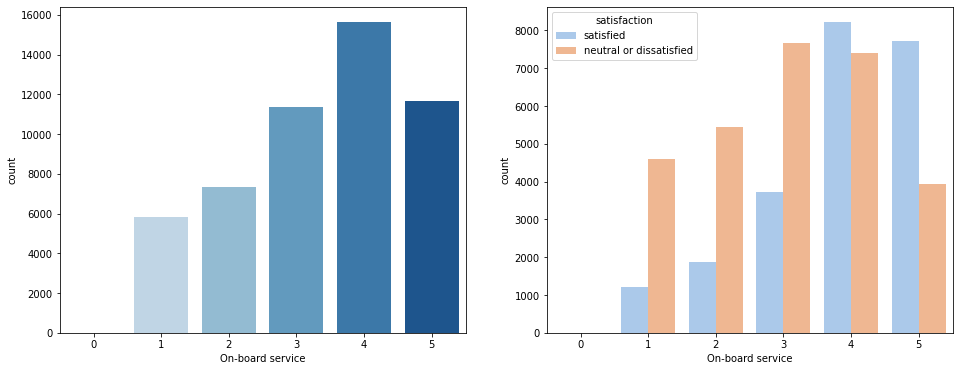

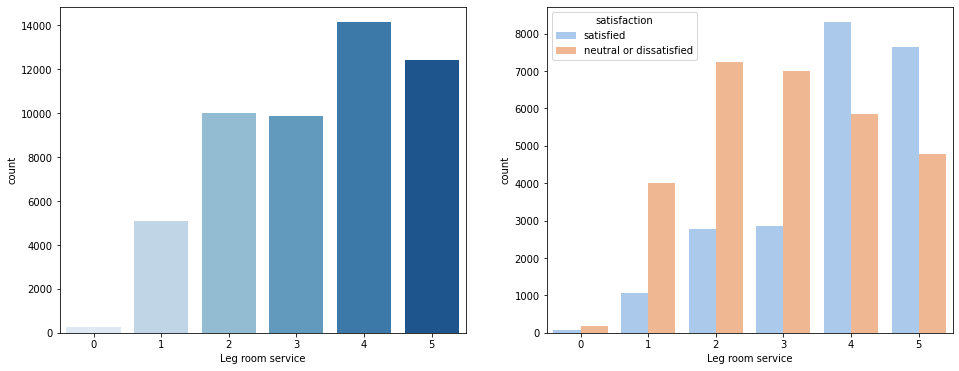

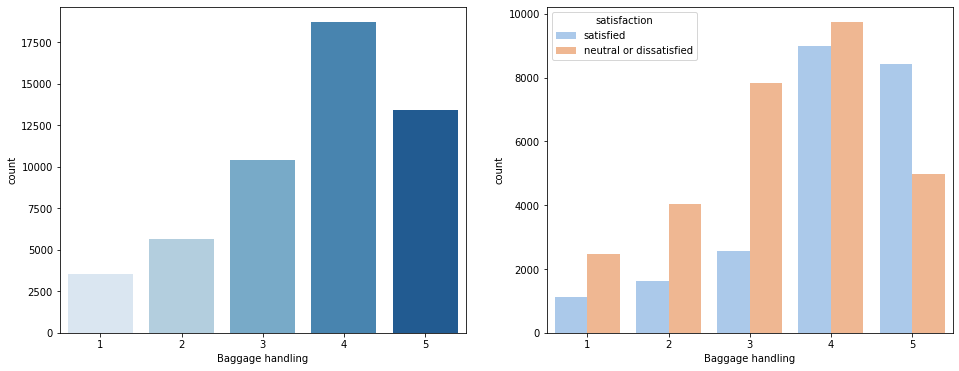

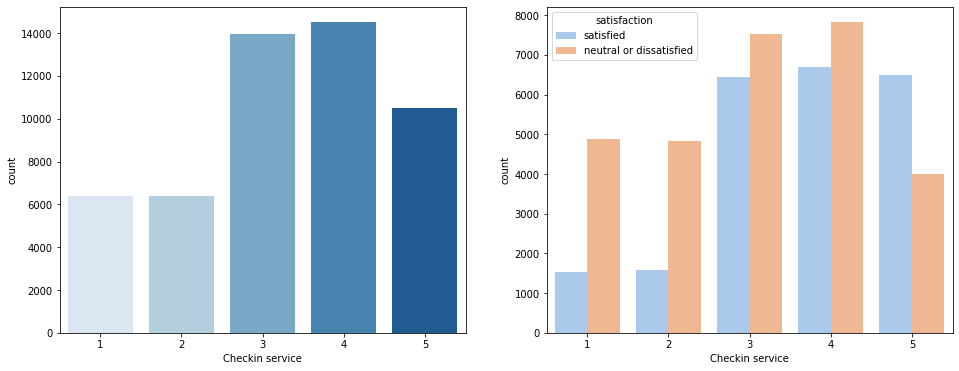

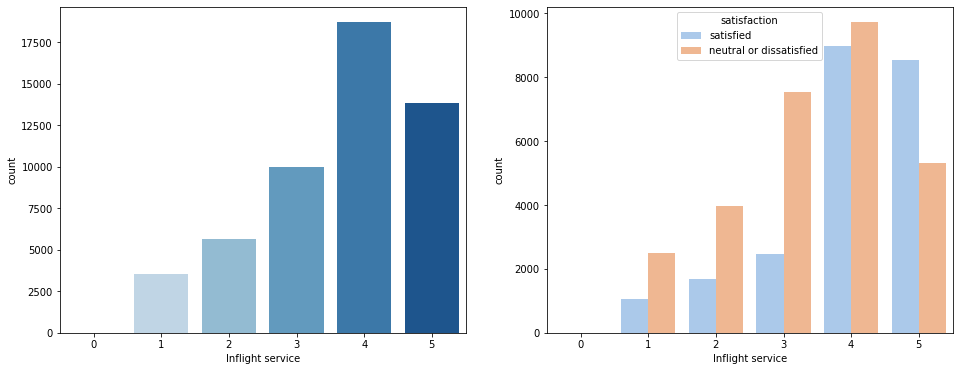

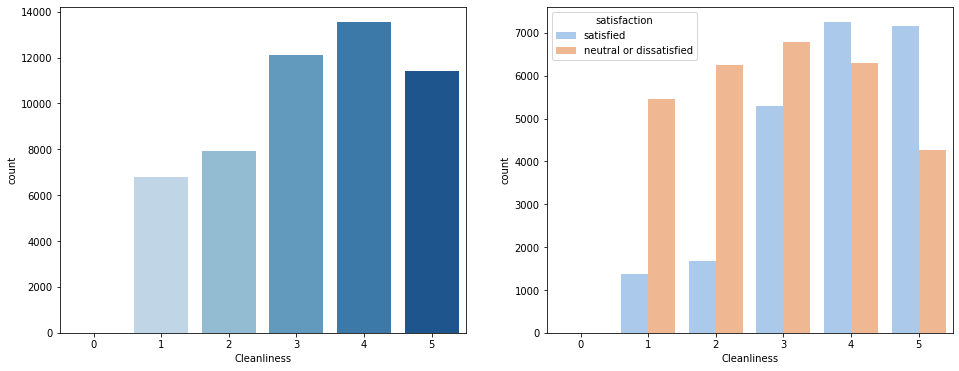

In [ ]:
for i in num_labels:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df[i], palette='Blues')

  plt.subplot(1,2,2)
  sns.countplot(x=df[i],hue=df.satisfaction, palette='pastel')
  plt.show()

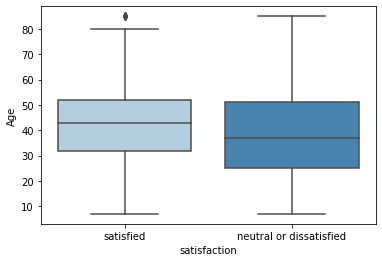

In [ ]:
sns.boxplot(y="Age",x="satisfaction",data=df, palette='Blues')

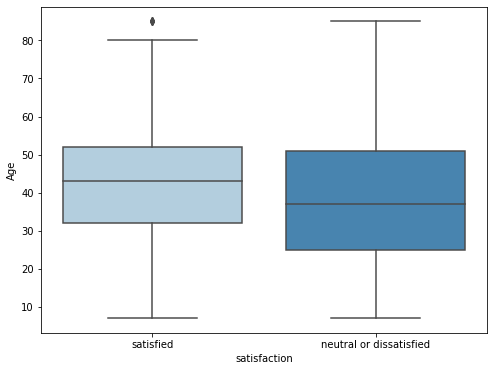

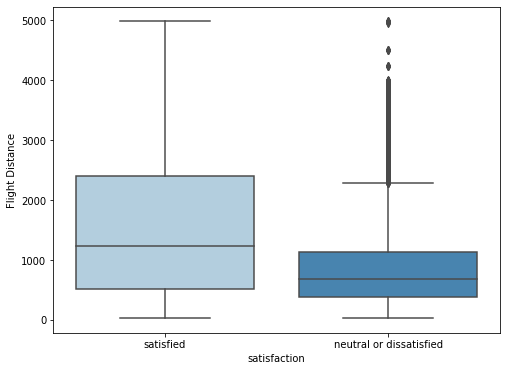

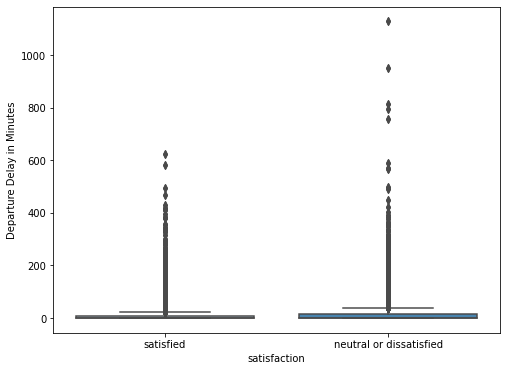

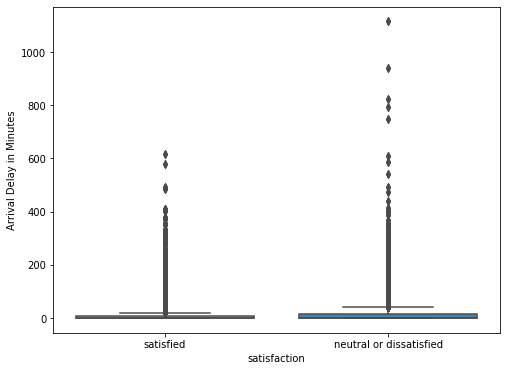

In [ ]:
for i in full_num:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=df[i],x=df.satisfaction,data=df, palette='Blues')
  plt.show()

## Data Preprocessing

In [ ]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})
df["Customer Type"]=df["Customer Type"].map({"disloyal Customer":0,"Loyal Customer":1})
df["Type of Travel"]=df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
df["Class"]=df["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})
df["satisfaction"]=df["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51786 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             51786 non-null  int64  
 1   Customer Type                      51786 non-null  int64  
 2   Age                                51786 non-null  int64  
 3   Type of Travel                     51786 non-null  int64  
 4   Class                              51786 non-null  int64  
 5   Flight Distance                    51786 non-null  int64  
 6   Inflight wifi service              51786 non-null  int64  
 7   Departure/Arrival time convenient  51786 non-null  int64  
 8   Ease of Online booking             51786 non-null  int64  
 9   Gate location                      51786 non-null  int64  
 10  Food and drink                     51786 non-null  int64  
 11  Online boarding                    51786 non-null  int

In [ ]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay, classification_report

def get_metrics(y_test, y_pred, labels):
    print(classification_report(y_test, y_pred, target_names=labels))
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=labels)
    disp.plot(cmap=plt.cm.OrRd)
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()

    plt.show()

In [ ]:
X = df.drop('satisfaction',axis=1).values
y = df['satisfaction'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
labels = ["neutral or dissatisfied","satisfied"]

## Data Training

In [ ]:
df.shape

(51786, 23)

### Gaussian Naive Bayes

                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.89      0.88      5830
              satisfied       0.86      0.83      0.84      4528

               accuracy                           0.87     10358
              macro avg       0.87      0.86      0.86     10358
           weighted avg       0.87      0.87      0.87     10358

Confusion Matrix:



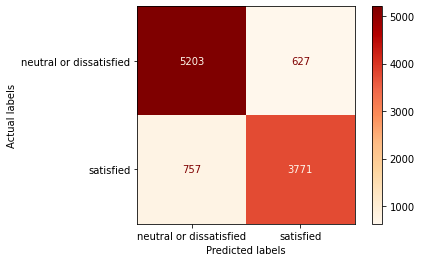

In [ ]:
# Gaussian NB is not affected by Standard Scaling
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 

In [ ]:
gs_NB.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
best_accuracy= gs_NB.best_score_

best_parameters=gs_NB.best_params_

print("Best Accuracy:", best_accuracy) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.8596119622703788
Best Parameters: {'var_smoothing': 0.0015199110829529332}


                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.89      0.88      5830
              satisfied       0.86      0.83      0.84      4528

               accuracy                           0.87     10358
              macro avg       0.87      0.86      0.86     10358
           weighted avg       0.87      0.87      0.87     10358

Confusion Matrix:



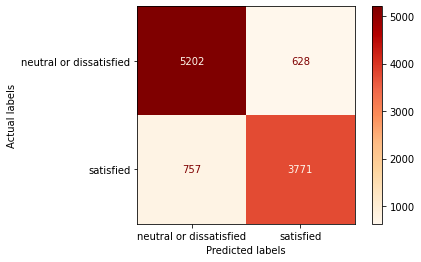

In [ ]:
model=GaussianNB(var_smoothing = 0.0015199110829529332)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

## Logistic Regression

                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.89      0.89      5830
              satisfied       0.86      0.85      0.85      4528

               accuracy                           0.87     10358
              macro avg       0.87      0.87      0.87     10358
           weighted avg       0.87      0.87      0.87     10358

Confusion Matrix:



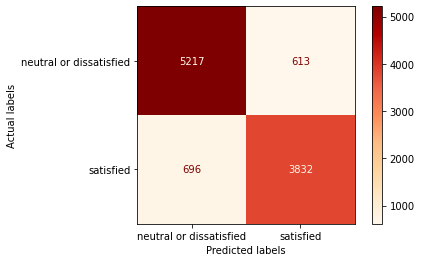

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

In [ ]:
param_LR = {"C":np.logspace(-3,3,7)}

gs_LR = GridSearchCV(estimator=LogisticRegression(), 
                 param_grid=param_LR, 
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 

In [ ]:
gs_LR.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy', verbose=1)

In [ ]:
best_accuracy= gs_LR.best_score_

best_parameters=gs_LR.best_params_

print("Best Accuracy:", best_accuracy) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.8699431037453873
Best Parameters: {'C': 0.01}


                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89      5830
              satisfied       0.86      0.84      0.85      4528

               accuracy                           0.87     10358
              macro avg       0.87      0.87      0.87     10358
           weighted avg       0.87      0.87      0.87     10358

Confusion Matrix:



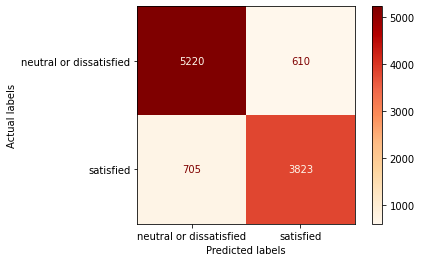

In [ ]:
model=LogisticRegression(C = 0.01)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95      5830
              satisfied       0.95      0.92      0.93      4528

               accuracy                           0.94     10358
              macro avg       0.94      0.94      0.94     10358
           weighted avg       0.94      0.94      0.94     10358

Confusion Matrix:



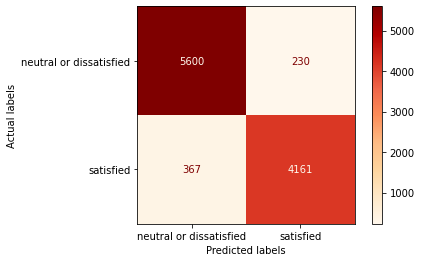

In [ ]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model = DecisionTreeClassifier(**params_dt)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

In [ ]:
param_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(), 
                 param_grid=param_DT, 
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 

In [ ]:
gs_DT.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
best_accuracy= gs_DT.best_score_

best_parameters=gs_DT.best_params_

print("Best Accuracy:", best_accuracy) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.9604616201921907
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}


                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.97      0.97      5830
              satisfied       0.97      0.96      0.96      4528

               accuracy                           0.97     10358
              macro avg       0.97      0.97      0.97     10358
           weighted avg       0.97      0.97      0.97     10358

Confusion Matrix:



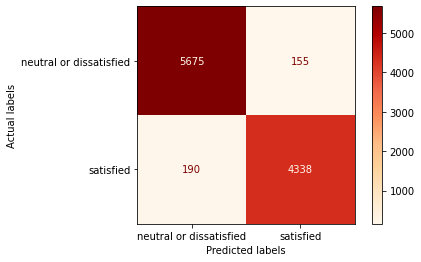

In [ ]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
get_metrics(y_test, y_pred, labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()

model.add(Dense(22,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stopping=EarlyStopping(monitor="val_loss",patience=15,restore_best_weights=True)

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[stopping],epochs=100,batch_size=64)

Epoch 1/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1951 - val_loss: 0.1624
Epoch 2/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1861 - val_loss: 0.1570
Epoch 3/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1789 - val_loss: 0.1538
Epoch 4/100
648/648 [==============================] - 2s 4ms/step - loss: 0.1731 - val_loss: 0.1477
Epoch 5/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1656 - val_loss: 0.1440
Epoch 6/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1629 - val_loss: 0.1387
Epoch 7/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1562 - val_loss: 0.1351
Epoch 8/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1557 - val_loss: 0.1347
Epoch 9/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1492 - val_loss: 0.1305
Epoch 10/100
648/648 [==============================] - 2s 3ms/step - loss: 0.1464 - val_lo

In [ ]:
y_pred = model.predict(X_test)
y_pred_cat = (y_pred > 0.5)

324/324 [==============================] - 1s 4ms/step


                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.97      0.96      5830
              satisfied       0.96      0.94      0.95      4528

               accuracy                           0.96     10358
              macro avg       0.96      0.96      0.96     10358
           weighted avg       0.96      0.96      0.96     10358

Confusion Matrix:



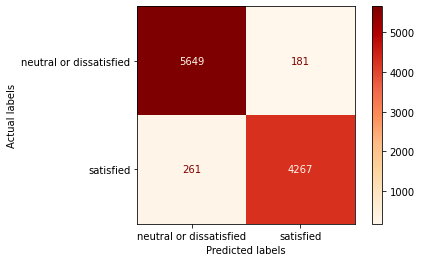

In [ ]:
get_metrics(y_test, y_pred_cat, labels)